## Imports

In [2]:
!wget http://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-03-12 05:49:58--  http://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt [following]
--2023-03-12 05:49:58--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2023-03-12 05:49:58 (21.5 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [3]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [4]:
print("length of the dataset in characters: ", len(text))

length of the dataset in characters:  1115394


In [5]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [6]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [7]:
# create a mapping from characters to integers
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i,ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s]    # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, outputs a string

print(encode("hi there"))
print(decode(encode("hi there")))

[46, 47, 1, 58, 46, 43, 56, 43]
hi there


In [8]:
# encode the entire text dataset and store it into a torch.Tensor
import torch
data = torch.tensor(encode(text), dtype = torch.long)
print(data.shape, data.type)
print(data[:1000]) # the 1000 characters will to the GPT look like this

torch.Size([1115394]) <built-in method type of Tensor object at 0x7fc14a728b30>
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 

In [9]:
# split the train and val datasets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [10]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [11]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [12]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data  if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1: i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimention
    for t in range(block_size): # time dimention
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [13]:
print(xb)

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


## Bigram Language model

In [14]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C) ~ (Batch, Time, Channel)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B,T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim = 1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size) 
logits, loss = m(xb, yb)
print(logits.shape)
print(loss.item())

idx = torch.zeros((1,1), dtype = torch.long)
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
4.878634929656982

SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


In [15]:
# create a Pytorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [16]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

  0%|          | 0/1000 [00:00<?, ?it/s]

3.704137086868286


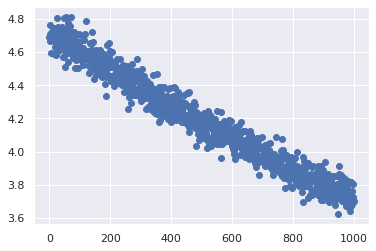

In [17]:
batch_size = 32
for steps in tqdm(range(1000)):
    # sample a batch of data
    xb, yb = get_batch('train')
    
    #evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none= True)
    loss.backward()
    optimizer.step()
    sns.set()
    plt.plot(steps, loss.item(), 'bo') 
print(loss.item()) 

In [18]:
idx = torch.zeros((1,1), dtype = torch.long)
print(decode((m.generate(idx, max_new_tokens=500)[0].tolist())))


Wh;;Sq.f ustNzknc
kwgOj$dhPWr,SV?hsusiKpgXXUh;Apmem d?hESXI.i;TrJgkiF-oKbXCAA -botrngFCHAUQkn$

pn$w-gHoi?wtd!
LLULIfSK'bAw :M.ZtOptXEQcL?hfaofqbPd?OnonQQJMap$aypupIBYGUsZaI'ottllo..k$W$Akp?yl?ajKlzY!lx&QQLW? t,bXFkyhl-dmVsHeckhRl,jSClgjuk:3Iv
?OqlrV;!Plxfzgy;;
'mRjuBQ&xk!$
h
SiruDJgKuDny,S$ERf.?GSV-ivvKcOvi-nQGX&q-YQbm dEM?px;Akr-IESq--wIWId
RFgXTpDUgM:CK$I!uo'IBT -
j?wfy fFr.&fiqtRS.ZttxGh' a!ogrn$zoZqbocL&yIffBDWNUboscuQqo.Fls,?,M?eZxHx?p?EV.mJiHqHnxT  bQpa;P fawiF$-QbWv&f:CVDCBfano,b?$Esev.?


# The mathematical trick in self-attention

In [19]:
# consider the following toy example:

torch.manual_seed(1337)
B, T, C = 4, 8, 2 #batch, time, channels
x = torch.randn(B, T, C)
x.shape

torch.Size([4, 8, 2])

### version 1

In [20]:
# we want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b, :t+1] # (t, C)
        xbow[b, t] = torch.mean(xprev, 0)

### version 2

In [21]:
wei = torch.tril(torch.ones(T, T))
wei = wei/ wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C)  --->  (B, T, C)

In [22]:
torch.allclose(xbow, xbow2)

True

### version 3 : use Softmax

In [23]:
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)

True

### version 4: self attention!

In [24]:
torch.manual_seed(1337)
B, T, C = 4, 8, 32 # batch, time, channels
x = torch.randn(B, T, C)

# single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias =False) 
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei = q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T)  ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
# wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
# out = wei @ x

out.shape

torch.Size([4, 8, 16])

* "Scaled" attention additional divides wei by 1/sqrt(head_size). This makes it so when Q, K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. 

In [25]:
k = torch.randn(B, T, head_size)
q = torch.randn(B, T, head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [26]:
wei.var()

tensor(1.0918)

In [27]:
class LayerNorm1d:

    def __init__(self, dim , eps=1e-5):
        self.eps = eps
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)

    def __call__(self, x):
        # calculate the forward pass
        xmean = x.mean(1, keepdim=True) # batch mean
        xvar = x.var(1, keepdim=True) # batch variance
        xhat = (x - xmean)/ torch.sqrt(xvar + self.eps) # normalize to unit variance
        self.out = self.gamma * xhat + self.beta
        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100) 
x = torch.randn(32, 100) # batch size 32 of 100-dimentional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [29]:
x[:,0].mean(), x[:,0].std() # mean, std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [30]:
x[0, :].mean() , x[0,:].std() # mean, std of a single input from the batch, of its features

(tensor(-9.5367e-09), tensor(1.0000))